In [16]:
import numpy as np
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('website_traffic.csv')

# Display data types to identify non-numeric columns
print(data.dtypes)

Page Views            int64
Session Duration    float64
Bounce Rate         float64
Traffic Source       object
Time on Page        float64
Previous Visits       int64
Conversion Rate     float64
dtype: object


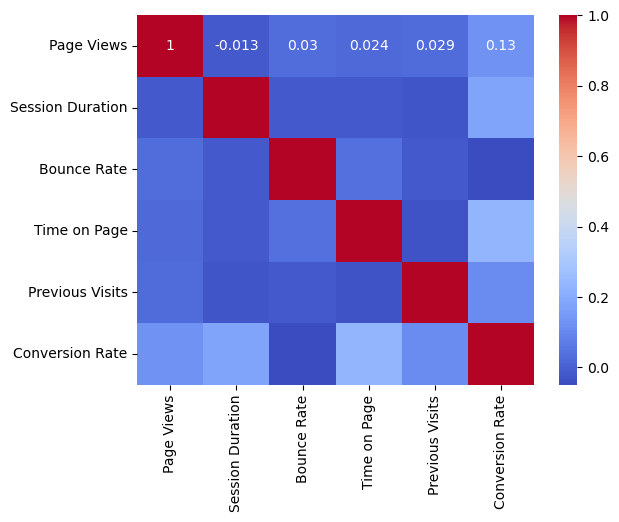

,Page Views,Session Duration,Bounce Rate,Time on Page,Previous Visits,Conversion Rate
Page Views,1.000000,-0.012788,0.030223,0.023941,0.028595,0.126635
Session Duration,-0.012788,1.000000,-0.015931,-0.013985,-0.025534,0.177798
Bounce Rate,0.030223,-0.015931,1.000000,0.039340,-0.015860,-0.049051
Time on Page,0.023941,-0.013985,0.039340,1.000000,-0.028729,0.229669
Previous Visits,0.028595,-0.025534,-0.015860,-0.028729,1.000000,0.109496
Conversion Rate,0.126635,0.177798,-0.049051,0.229669,0.109496,1.000000


In [17]:
# Select only numeric columns (exclude 'Traffic Source')
numeric_data = data.drop(columns=['Traffic Source'])

# Calculate correlation matrix
corr_matrix = numeric_data.corr()

# Extract the correlation with Conversion Rate
corr_with_conversion = corr_matrix['Conversion Rate'].sort_values(ascending=False)

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()
corr_matrix

**From the correlation matrix:**

- Page Views: 0.126635
- Session Duration: 0.177798
- Time on Page: 0.229669
- Previous Visits: 0.109496

All these features have a positive correlation with Conversion Rate, so select them as potential predictors for the Conversion Rate.

In [18]:
# Select features with positive correlation
selected_features = ['Page Views', 'Session Duration', 'Time on Page', 'Previous Visits']

# Prepare the dataset for modeling
X = numeric_data[selected_features]
y = numeric_data['Conversion Rate']


In [19]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 0.031691679454020995


The Mean Absolute Error (MAE) value of 0.0317 (approximately) suggests that, on average, the model's predictions of the Conversion Rate are off by about 0.0317 from the actual values.

The model is doing a good job of predicting the Conversion Rate, with an average prediction error of about 3.17%.

**Step 7: Determine the Optimal Number of Clusters**

D:\Users\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Users\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
D:\Users\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Users\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=

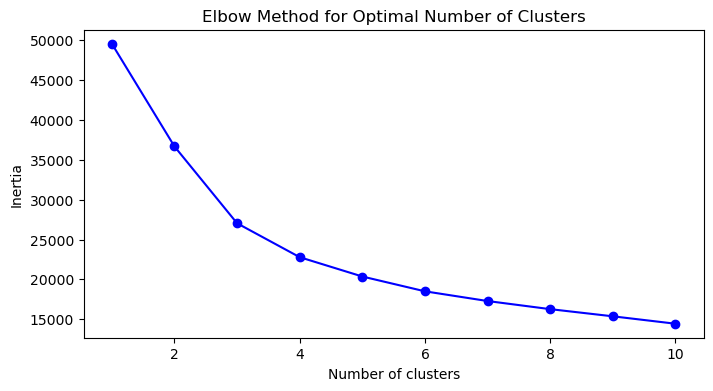

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Use the selected features for clustering
X_clustering = numeric_data[selected_features]

# Calculate inertia for different numbers of clusters
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_clustering)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


In [26]:
# Step 8: Clustering
from sklearn.cluster import KMeans

# Apply K-means clustering with 3 clusters
optimal_clusters = 4

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(X_clustering)

# Add the cluster labels to the original data
data['Cluster'] = clusters

# Display the first few rows of the updated dataset
data.head()

D:\Users\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Users\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate,Cluster
0,5,11.051381,0.230652,Organic,3.890460,3,1.0,2
1,4,3.429316,0.391001,Social,8.478174,0,1.0,3
2,4,1.621052,0.397986,Organic,9.636170,2,1.0,3
3,5,3.629279,0.180458,Organic,2.071925,3,1.0,1
4,5,4.235843,0.291541,Paid,1.960654,5,1.0,1


In [27]:
# Step 9: Cluster Analysis

# Exclude the non-numeric column 'Traffic Source'
numeric_columns = data.select_dtypes(include=[np.number])

# Group the numeric data by cluster and calculate the mean of each feature
cluster_means = numeric_columns.groupby(data['Cluster']).mean()

# Display the mean values of each feature for each cluster
print(cluster_means)


         Page Views  Session Duration  Bounce Rate  Time on Page  \
Cluster                                                            
0          7.313208          1.994288     0.285758      2.959120   
1          3.531060          1.944717     0.282543      2.813290   
2          4.759717          9.083344     0.280872      3.463099   
3          4.860656          2.240212     0.291331      8.734362   

         Previous Visits  Conversion Rate  Cluster  
Cluster                                             
0               2.098113         0.987949      0.0  
1               1.943971         0.964089      1.0  
2               1.872792         1.000000      2.0  
3               1.964481         1.000000      3.0  


D:\Users\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_c

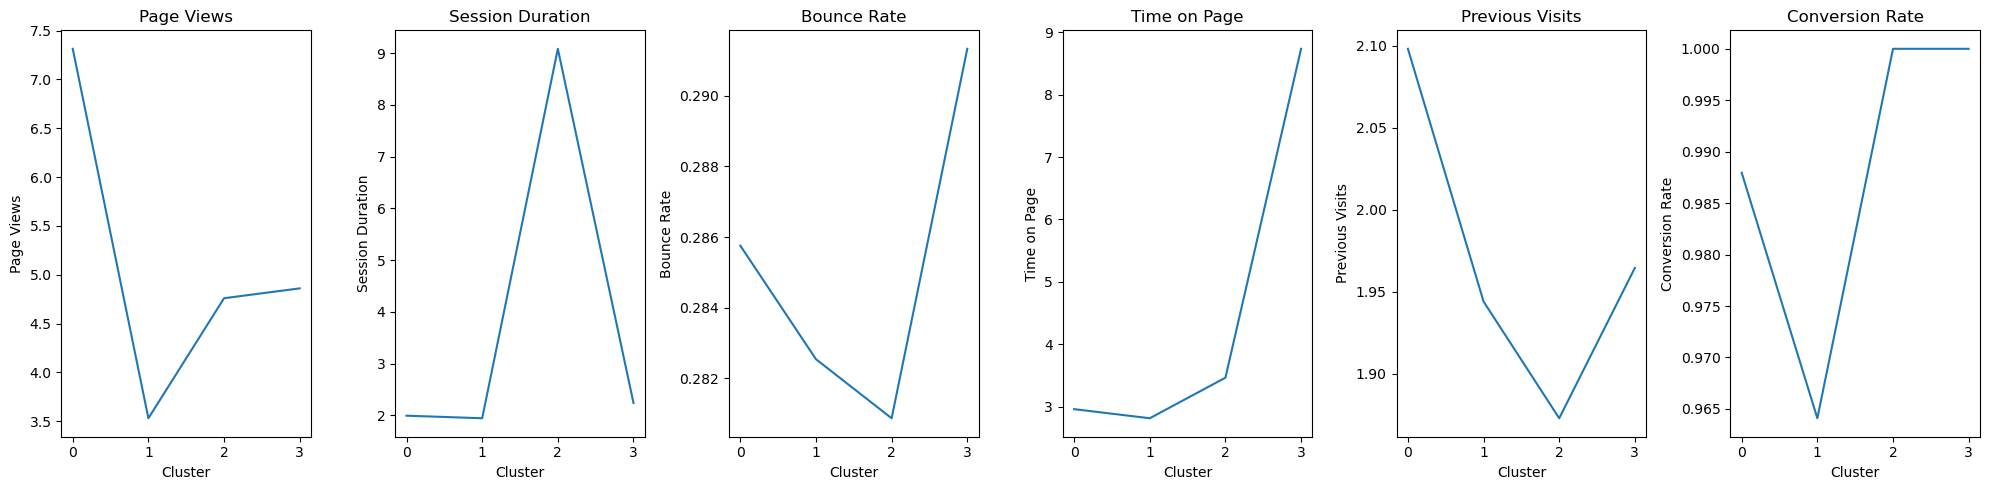

In [34]:
# Step 10: Cluster Visualization

# Extract the feature names (columns of the cluster_means DataFrame)
features = cluster_means.columns.drop('Cluster')  # Exclude the 'Cluster' column

# Define the number of plots and layout
num_plots = len(features)
fig, axes = plt.subplots(nrows=1, ncols=num_plots, figsize=(20, 5))

# Loop through each feature and plot
for i, feature in enumerate(features):
    sns.lineplot(x=cluster_means.index, y=cluster_means[feature], ax=axes[i])
    axes[i].set_title(feature)
    axes[i].set_xlabel("Cluster")
    axes[i].set_ylabel(feature)
    
# Improve spacing between plots
plt.tight_layout()
plt.show()

# Findings Interpretation:
The line plots show the average values of various features (Page Views, Session Duration, Bounce Rate, Time on Page, Previous Visits, and Conversion Rate) across the four clusters. Each cluster represents a group of observations with similar characteristics based on the clustering algorithm used.

**1. Page Views:**

- Cluster 0 has the highest average page views, indicating that users in this cluster visit the website more frequently.
- Cluster 1 has the lowest page views, while Clusters 2 and 3 show moderate engagement.
  
Insight: This suggests that users in Cluster 0 are highly engaged with the content, while users in Cluster 1 may not find the content as appealing.

**2. Session Duration:**
- Cluster 2 has a significantly higher session duration compared to other clusters, suggesting that users in this group spend much more time on the website.
- Clusters 0, 1, and 3 have much lower session durations.

Insight: The high session duration in Cluster 2 could indicate that users are deeply engaged with the content, possibly because they find it more relevant or interesting.

**3. Bounce Rate:**
- Cluster 3 has the highest bounce rate, indicating that users in this group are more likely to leave the site quickly after viewing only one page.
- Clusters 0 and 1 have slightly lower bounce rates, while Cluster 2 has the lowest bounce rate.

Insight: The lower bounce rate in Cluster 2 aligns with the higher session duration, suggesting that these users are more likely to explore multiple pages, leading to a better overall user experience.

**4. Time on Page:**
- Cluster 3 again shows a higher time on page, consistent with the higher session duration observed earlier.
- Clusters 0, 1, and 2 have lower average times on page.

Insight: The users in Cluster 3 seem to engage more deeply with individual pages, which could be related to the type of content or the usability of the website for this particular group.

**5. Previous Visits:**
- Cluster 0 users have the highest number of previous visits, suggesting that they are repeat visitors.
- Cluster 2 has the lowest previous visits, indicating that users in this group might be newer to the site.

Insight: The high previous visits in Cluster 0 might contribute to their higher page views and overall engagement with the site.

**6. Conversion Rate:**
- Cluster 3 has the highest conversion rate, closely followed by Cluster 0.
- Clusters 1 and 2 have lower conversion rates.

Insight: The high conversion rate in Cluster 3 suggests that despite the high bounce rate, when users do stay, they are more likely to convert, possibly due to targeted content or effective calls to action.

# Overall Insights:
- Cluster 0: Represents users with high engagement (high page views and previous visits) but moderate session duration. This group might consist of loyal users who frequently visit the site.
- Cluster 1: Represents users with the lowest engagement metrics, suggesting that the website content might not be resonating well with this group.
- Cluster 2: Represents users who spend the most time on the site with the lowest bounce rate, indicating deep engagement with the content.
- Cluster 3: Represents users with a high conversion rate and bounce rate, indicating that when these users engage, they are likely to convert, even though many leave quickly.